In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
class ReportAssistant():
    def __init__(self):
        self.usage = pd.read_csv("./state/metrics/usage.csv")
        # self.messages = pd.read_csv("./state/metrics/messages.csv")
        self.feedback = pd.read_csv("./state/metrics/feedback.csv")
        self.current_df = None
        self.target_var = None
        self.explain_var = None

    def read_df(self, df: pd.DataFrame, n=10):
        print(df.head(n))
        return df

    def view_graph(self, df: pd.DataFrame, type = 'bar chart'):
        lst = list(df.columns)
        print(lst)
        while self.target_var == None:
            print("What do you want to see data about?")
            col = input(f"{lst}")
            if col in lst:
                self.target_var = col
            else:
                print(f"Sorry, {col} is not one of the {self.current_df} fields.")

        lst.remove(self.target_var)
        print(lst)
        while self.explain_var == None:
            print("Great! What do you what to compare {y_axis} against?")
            col = input(f"{lst}")
            if col in lst:
                self.explain_var = col
            else:
                print(f"Sorry, {col} is not one of the {self.current_df} fields.")

        if type == "bar chart":
            # print(f'You chose a to view {self.current_df} by a bar chart')
            pass

        # Create the bar chart
        plt.bar(df[self.explain_var], df[self.target_var])

        # Rotate x-axis labels for readability
        plt.xticks(rotation=45)

        # Add labels and title
        plt.xlabel(self.explain_var)
        plt.ylabel(self.target_var)
        plt.title(f'{self.target_var} by {self.explain_var}')

        # Show plot
        plt.tight_layout()  # Ensure everything fits without overlap
        plt.show()

In [33]:
def get_df(assistant: ReportAssistant):
    while True:
        df_request = input("Which data do you want to view from? Usage, messages, or feedback?\n").lower()
        match df_request:
            case 'usage' | 'u':
                assistant.current_df = 'usage'
                return assistant.read_df(assistant.usage)
            case 'feedback' | 'f':
                assistant.current_df = 'feedback'
                return assistant.read_df(assistant.feedback)
            case 'q':
                print("See you next time!")
                return None
            case _:
                print(f"Sorry, '{df_request}' is not an option.")

In [44]:
assistant = ReportAssistant()
df = get_df(assistant)

data = {
    'user_id': ['1011429191046144110', '1062212682725466132'],
    'output_tokens': [843, 372]
}

df = pd.DataFrame(data)

                          timestamp             guild_id            thread_id  \
0  2024-09-19T13:57:14.845305-06:00  1058490579799003187  1286415799652978730   
1  2024-09-20T10:14:30.737584-06:00  1058490579799003187  1286722124974919733   
2  2024-09-20T10:14:36.989044-06:00  1058490579799003187  1286722124974919733   
3  2024-09-20T10:27:29.005306-06:00  1058490579799003187  1286725345051017331   
4  2024-09-20T10:27:34.549281-06:00  1058490579799003187  1286725345051017331   
5  2024-09-20T10:36:57.585675-06:00  1058490579799003187  1286727762765283450   
6  2024-09-20T10:37:24.903747-06:00  1058490579799003187  1286727762765283450   
7  2024-09-20T10:37:42.553303-06:00  1058490579799003187  1286727762765283450   
8  2024-09-20T10:38:03.159440-06:00  1058490579799003187  1286727762765283450   
9  2024-09-20T10:38:51.587045-06:00  1058490579799003187  1286727762765283450   

               user_id  engine  input_tokens  output_tokens  
0  1062212682725466132  gpt-4o           559  

['user_id', 'output_tokens']
What do you want to see data about?
['user_id']
Great! What do you what to compare {y_axis} against?


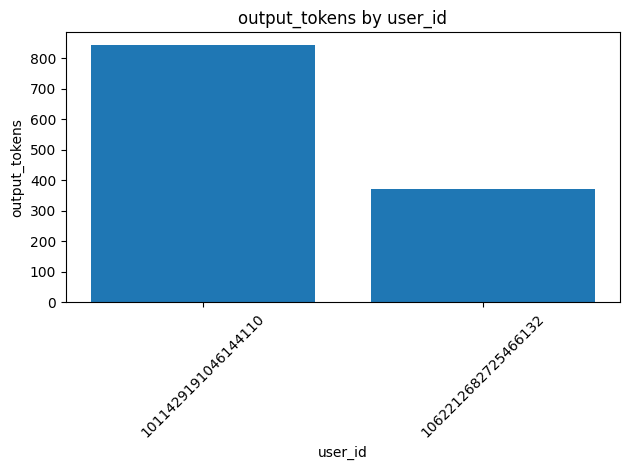

In [45]:
assistant.view_graph(df)

In [36]:
import seaborn as sns
print(sns.__version__)  # Check Seaborn version
print(sns.__file__)     # Check path to Seaborn installation


0.13.2
C:\Users\bryce\AppData\Roaming\Python\Python311\site-packages\seaborn\__init__.py
